## Predicting default on credit card payments

In [211]:
import pandas as pd
df_taiwan= pd.read_csv('default+of+credit+card+clients_tiwan/default of credit card clients_with_information.csv')
df_taiwan.head()

,ID,Amount_of_Credit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,...,Bill_Statement_Jun_2005,Bill_Statement_May_2005,Bill_Statement_Apr_2005,Previous_Payment_Sep_2005,Previous_Payment_Aug_2005,Previous_Payment_Jul_2005,Previous_Payment_Jun_2005,Previous_Payment_May_2005,Previous_Payment_Apr_2005,Default_Payment_Next_Month
0,1,20000,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [212]:
df_taiwan.shape

(30000, 25)

In [213]:
df_taiwan.isnull().sum()

ID                               0
Amount_of_Credit                 0
Gender                           0
Education_Level                345
Marital_Status                  54
Age                              0
Repayment_Status_Sep_2005     2759
Repayment_Status_Aug_2005     3782
Repayment_Status_Jul_2005     4085
Repayment_Status_Jun_2005     4348
Repayment_Status_May_2005     4546
Repayment_Status_Apr_2005     4895
Bill_Statement_Sep_2005          0
Bill_Statement_Aug_2005          0
Bill_Statement_Jul_2005          0
Bill_Statement_Jun_2005          0
Bill_Statement_May_2005          0
Bill_Statement_Apr_2005          0
Previous_Payment_Sep_2005        0
Previous_Payment_Aug_2005        0
Previous_Payment_Jul_2005        0
Previous_Payment_Jun_2005        0
Previous_Payment_May_2005        0
Previous_Payment_Apr_2005        0
Default_Payment_Next_Month       0
dtype: int64

Null values appeared after converting the dataframe because some variables were mapped based on a provided guide. However, the guide did not include definitions for certain variable values. As a result, when applying the mapping, any value not explicitly defined in the guide was converted to `NaN`.


In [214]:
df_taiwan = df_taiwan.dropna()

In [215]:
df_taiwan.isnull().sum()

ID                            0
Amount_of_Credit              0
Gender                        0
Education_Level               0
Marital_Status                0
Age                           0
Repayment_Status_Sep_2005     0
Repayment_Status_Aug_2005     0
Repayment_Status_Jul_2005     0
Repayment_Status_Jun_2005     0
Repayment_Status_May_2005     0
Repayment_Status_Apr_2005     0
Bill_Statement_Sep_2005       0
Bill_Statement_Aug_2005       0
Bill_Statement_Jul_2005       0
Bill_Statement_Jun_2005       0
Bill_Statement_May_2005       0
Bill_Statement_Apr_2005       0
Previous_Payment_Sep_2005     0
Previous_Payment_Aug_2005     0
Previous_Payment_Jul_2005     0
Previous_Payment_Jun_2005     0
Previous_Payment_May_2005     0
Previous_Payment_Apr_2005     0
Default_Payment_Next_Month    0
dtype: int64

In [216]:
df_taiwan.shape

(23150, 25)

In [217]:
#'our target is Default_Payment_Next_Month

In [218]:
# Binary encoding of the target
df_taiwan['Default_Payment_Next_Month'] = df_taiwan['Default_Payment_Next_Month'].map({'Yes': 1, 'No': 0})

In [219]:
df_taiwan.dtypes

ID                             int64
Amount_of_Credit               int64
Gender                        object
Education_Level               object
Marital_Status                object
Age                            int64
Repayment_Status_Sep_2005     object
Repayment_Status_Aug_2005     object
Repayment_Status_Jul_2005     object
Repayment_Status_Jun_2005     object
Repayment_Status_May_2005     object
Repayment_Status_Apr_2005     object
Bill_Statement_Sep_2005        int64
Bill_Statement_Aug_2005        int64
Bill_Statement_Jul_2005        int64
Bill_Statement_Jun_2005        int64
Bill_Statement_May_2005        int64
Bill_Statement_Apr_2005        int64
Previous_Payment_Sep_2005      int64
Previous_Payment_Aug_2005      int64
Previous_Payment_Jul_2005      int64
Previous_Payment_Jun_2005      int64
Previous_Payment_May_2005      int64
Previous_Payment_Apr_2005      int64
Default_Payment_Next_Month     int64
dtype: object

In [220]:
df_taiwan['Education_Level'].unique()

array(['University', 'Graduate School', 'High School', 'Others'],
      dtype=object)

In [221]:
categorical_cols = [
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Repayment_Status_Sep_2005',
    'Repayment_Status_Aug_2005',
    'Repayment_Status_Jul_2005',
    'Repayment_Status_Jun_2005',
    'Repayment_Status_May_2005',
    'Repayment_Status_Apr_2005'
]


In [222]:
df_taiwan['Repayment_Status_Jul_2005'].unique()

array(['No Consumption', 'Paid Duly', 'Delay 2 Months', 'Delay 3 Months',
       'Delay 4 Months', 'Delay 6 Months', 'Delay 7 Months',
       'Delay 1 Month', 'Delay 5 Months', 'Delay 8 Months'], dtype=object)

In [223]:
df_taiwan_FE=df_taiwan.copy()

In [224]:
from sklearn.preprocessing import OrdinalEncoder

# Define the repayment status order
repayment_order = [
    'No Consumption', #0
    'Paid Duly',#1
    'Delay 1 Month',#2
    'Delay 2 Months',#3
    'Delay 3 Months',#4
    'Delay 4 Months',#5
    'Delay 5 Months',#6
    'Delay 6 Months',#7
    'Delay 7 Months',#8
    'Delay 8 Months'#9
]

# List of repayment status columns
repayment_cols = [
    'Repayment_Status_Sep_2005',
    'Repayment_Status_Aug_2005',
    'Repayment_Status_Jul_2005',
    'Repayment_Status_Jun_2005',
    'Repayment_Status_May_2005',
    'Repayment_Status_Apr_2005'
]

# Initialize encoder with the same category order for each column
encoder = OrdinalEncoder(
    categories=[repayment_order] * len(repayment_cols),
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

# Apply encoding
df_taiwan_FE[repayment_cols] = encoder.fit_transform(df_taiwan_FE[repayment_cols])

In [225]:
df_taiwan_FE

,ID,Amount_of_Credit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,...,Bill_Statement_Jun_2005,Bill_Statement_May_2005,Bill_Statement_Apr_2005,Previous_Payment_Sep_2005,Previous_Payment_Aug_2005,Previous_Payment_Jul_2005,Previous_Payment_Jun_2005,Previous_Payment_May_2005,Previous_Payment_Apr_2005,Default_Payment_Next_Month
1,2,120000,Female,University,Single,26,1.0,3.0,0.0,0.0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0.0,0.0,0.0,0.0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0.0,0.0,0.0,0.0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,1.0,0.0,1.0,0.0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,Male,Graduate School,Single,37,0.0,0.0,0.0,0.0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,Male,High School,Married,39,0.0,0.0,0.0,0.0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,Male,High School,Single,43,1.0,1.0,1.0,1.0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,Male,University,Single,37,5.0,4.0,3.0,1.0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,Male,High School,Married,41,2.0,1.0,0.0,0.0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [226]:
df_taiwan['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [227]:
gender_map = {'Male': 1, 'Female': 0}
df_taiwan_FE['Gender'] = df_taiwan_FE['Gender'].replace(gender_map).astype(int)

C:\Users\sabri\AppData\Local\Temp\ipykernel_28708\632629906.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_taiwan_FE['Gender'] = df_taiwan_FE['Gender'].replace(gender_map).astype(int)


In [228]:
df_taiwan['Education_Level'].unique()

array(['University', 'Graduate School', 'High School', 'Others'],
      dtype=object)

In [229]:
education_map = {
    'Others': 0,
    'High School': 1,
    'University': 2,
    'Graduate School': 3
}
df_taiwan_FE['Education_Level'] = df_taiwan_FE['Education_Level'].replace(education_map).astype(int)

C:\Users\sabri\AppData\Local\Temp\ipykernel_28708\2470650819.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_taiwan_FE['Education_Level'] = df_taiwan_FE['Education_Level'].replace(education_map).astype(int)


In [230]:
df_taiwan['Marital_Status'].unique()

array(['Single', 'Married', 'Others'], dtype=object)

In [231]:
marital_map = {
    'Others': 0,
    'Single': 1,
    'Married': 2
}
df_taiwan_FE['Marital_Status'] = df_taiwan_FE['Marital_Status'].replace(marital_map).astype(int)

C:\Users\sabri\AppData\Local\Temp\ipykernel_28708\1065652711.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_taiwan_FE['Marital_Status'] = df_taiwan_FE['Marital_Status'].replace(marital_map).astype(int)


In [232]:
df_taiwan_FE = df_taiwan_FE.drop(columns=['ID'])

In [233]:
df_taiwan_FE

,Amount_of_Credit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,Repayment_Status_May_2005,...,Bill_Statement_Jun_2005,Bill_Statement_May_2005,Bill_Statement_Apr_2005,Previous_Payment_Sep_2005,Previous_Payment_Aug_2005,Previous_Payment_Jul_2005,Previous_Payment_Jun_2005,Previous_Payment_May_2005,Previous_Payment_Apr_2005,Default_Payment_Next_Month
1,120000,0,2,1,26,1.0,3.0,0.0,0.0,0.0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,1,34,0.0,0.0,0.0,0.0,0.0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,2,37,0.0,0.0,0.0,0.0,0.0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,2,57,1.0,0.0,1.0,0.0,0.0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,3,1,37,0.0,0.0,0.0,0.0,0.0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,1,2,39,0.0,0.0,0.0,0.0,0.0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,1,1,43,1.0,1.0,1.0,1.0,0.0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,1,37,5.0,4.0,3.0,1.0,0.0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,1,2,41,2.0,1.0,0.0,0.0,0.0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [234]:
df_taiwan_FE.shape

(23150, 24)

#### <a id='toc1_1_1_2_'></a>[Train Test Split](#toc0_)

In [235]:
from sklearn.model_selection import train_test_split
X, y = df_taiwan_FE.drop(columns=['Default_Payment_Next_Month']), df_taiwan_FE['Default_Payment_Next_Month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN model

In [236]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15) #Creating an instance of the model

knn.fit(X_train, y_train) # Training the model

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [237]:
pred = knn.predict(X_test) #predictions for new data points

In [238]:
knn.score(X_test, y_test)# evaluating the model using score to get the accuracy

0.7600431965442764

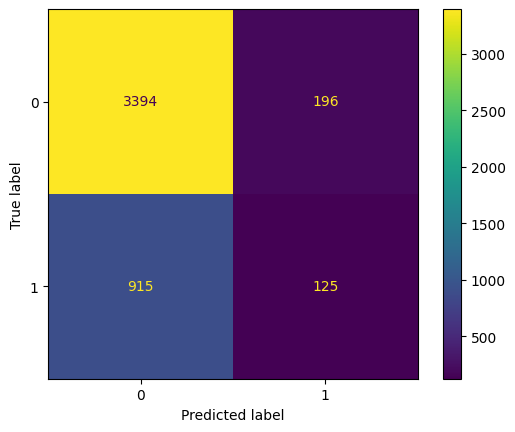

In [239]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knn.predict(X_test))

- True Negatives (3442): The model correctly identifies customers who will not default.
-  False Positives (148): The model incorrectly predicts default for customers who are actually solvent.
-  False Negatives (929): The model fails to detect a large number of customers who will default.
-  True Positives (111): The model correctly identifies some high-risk customers


In [240]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      3590
           1       0.39      0.12      0.18      1040

    accuracy                           0.76      4630
   macro avg       0.59      0.53      0.52      4630
weighted avg       0.70      0.76      0.71      4630



-  Class 0 is well predicted: High precision and recall indicate the model is very effective at identifying non-defaulters.
-  Class 1 is poorly predicted: Low recall (11%) means the model misses most actual defaulters, and the low F1-score (17%) confirms weak performance on this minority class.


#### <a id='toc1_1_1_3_'></a>[Normalization](#toc0_)

In [241]:

from sklearn.preprocessing import MinMaxScaler

# Create an instance of the normalizer
minmax = MinMaxScaler() 
#Fit it to our training data
minmax.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [242]:
#Transforming our training and testing data
X_train_transformed = minmax.transform(X_train)
X_test_transformed = minmax.transform(X_test)
# we do this because when applying transformations of our dataframe, normalizer will return an array instead of a dataframe object
X_train_transformed = pd.DataFrame(minmax.transform(X_train))
X_test_transformed = pd.DataFrame(minmax.transform(X_test))
X_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.080808,0.0,0.666667,0.5,0.051724,0.000000,0.000000,0.000,0.000000,0.000,...,0.202272,0.164615,0.085757,0.264563,0.005941,0.001011,0.001362,0.001891,0.001172,0.001513
1,0.262626,0.0,0.666667,0.5,0.068966,0.000000,0.000000,0.000,0.000000,0.000,...,0.213874,0.184269,0.105868,0.280933,0.002733,0.001156,0.001588,0.001721,0.002209,0.001799
2,0.010101,0.0,0.666667,1.0,0.189655,0.444444,0.333333,0.000,0.000000,0.000,...,0.208100,0.170579,0.091474,0.269420,0.000000,0.000952,0.000429,0.000737,0.001482,0.001165
3,0.282828,0.0,0.666667,1.0,0.206897,0.000000,0.000000,0.000,0.000000,0.000,...,0.311619,0.254520,0.164205,0.319657,0.007327,0.003264,0.004464,0.005672,0.006865,0.003783
4,0.020202,0.0,1.000000,0.5,0.051724,0.000000,0.000000,0.000,0.000000,0.000,...,0.212652,0.183295,0.105353,0.280406,0.002689,0.001382,0.001903,0.001961,0.002145,0.001757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18515,0.141414,0.0,0.666667,1.0,0.482759,0.111111,0.111111,0.000,0.111111,0.125,...,0.188958,0.161394,0.082747,0.261823,0.010137,0.000817,0.001491,0.004006,0.002574,0.001432
18516,0.151515,0.0,0.666667,0.5,0.086207,0.222222,0.333333,0.375,0.333333,0.125,...,0.185399,0.160138,0.081043,0.260979,0.000788,0.000000,0.000000,0.000753,0.000000,0.000000
18517,0.393939,1.0,0.666667,1.0,0.396552,0.111111,0.111111,0.000,0.000000,0.000,...,0.216229,0.174581,0.090559,0.264187,0.117960,0.000901,0.011184,0.000096,0.011101,0.003278
18518,0.010101,1.0,0.666667,0.5,0.120690,0.222222,0.333333,0.375,0.333333,0.000,...,0.205114,0.175769,0.098653,0.276006,0.000990,0.001630,0.000000,0.003781,0.003986,0.000000


In [243]:
X_train_transformed = pd.DataFrame(minmax.transform(X_train), columns=X_train.columns)
X_test_transformed = pd.DataFrame(minmax.transform(X_test), columns=X_train.columns)
X_test_transformed

,Amount_of_Credit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,Repayment_Status_May_2005,...,Bill_Statement_Jul_2005,Bill_Statement_Jun_2005,Bill_Statement_May_2005,Bill_Statement_Apr_2005,Previous_Payment_Sep_2005,Previous_Payment_Aug_2005,Previous_Payment_Jul_2005,Previous_Payment_Jun_2005,Previous_Payment_May_2005,Previous_Payment_Apr_2005
0,0.020202,0.0,0.666667,0.5,0.224138,0.333333,0.111111,0.375,0.333333,0.375,...,0.222372,0.195062,0.117992,0.289339,0.065347,0.026893,0.006484,0.002505,0.000000,0.005854
1,0.313131,0.0,0.666667,1.0,0.206897,0.000000,0.000000,0.000,0.000000,0.000,...,0.451574,0.369521,0.302947,0.435298,0.019935,0.008964,0.005580,0.008544,0.006204,0.040587
2,0.090909,0.0,1.000000,1.0,0.310345,0.000000,0.000000,0.000,0.333333,0.375,...,0.193512,0.166762,0.088494,0.266851,0.002178,0.002852,0.000000,0.001891,0.000000,0.009458
3,0.303030,0.0,1.000000,0.5,0.068966,0.333333,0.000000,0.000,0.000000,0.000,...,0.462209,0.337260,0.250105,0.313519,0.023123,0.006850,0.006696,0.009594,0.007034,0.005675
4,0.191919,0.0,1.000000,0.5,0.120690,0.000000,0.000000,0.000,0.000000,0.000,...,0.355360,0.286863,0.208952,0.356702,0.063366,0.048896,0.007037,0.008130,0.010550,0.008512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,0.050505,1.0,0.333333,0.5,0.224138,0.111111,0.111111,0.125,0.111111,0.125,...,0.185314,0.160445,0.081120,0.261229,0.000646,0.000266,0.000364,0.000900,0.000764,0.000617
4626,0.090909,1.0,0.333333,0.5,0.086207,0.000000,0.000000,0.000,0.000000,0.000,...,0.223794,0.191329,0.080648,0.261528,0.004606,0.001630,0.001451,0.000000,0.001676,0.000000
4627,0.252525,1.0,1.000000,0.5,0.137931,0.000000,0.000000,0.000,0.000000,0.000,...,0.246176,0.204131,0.127748,0.295583,0.011881,0.004890,0.005580,0.009454,0.009378,0.009458
4628,0.040404,1.0,0.666667,0.5,0.051724,0.000000,0.000000,0.000,0.000000,0.000,...,0.208616,0.178902,0.100204,0.276684,0.002630,0.001072,0.000785,0.001367,0.002462,0.001264


In [244]:
knn = KNeighborsClassifier(n_neighbors=15) #Creating an instance of the model

knn.fit(X_train_transformed, y_train) # Training the model

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [245]:
pred = knn.predict(X_test_transformed) #predictions for new data points

In [246]:
knn.score(X_test_transformed, y_test)# evaluating the model using score to get the accuracy

0.8125269978401728

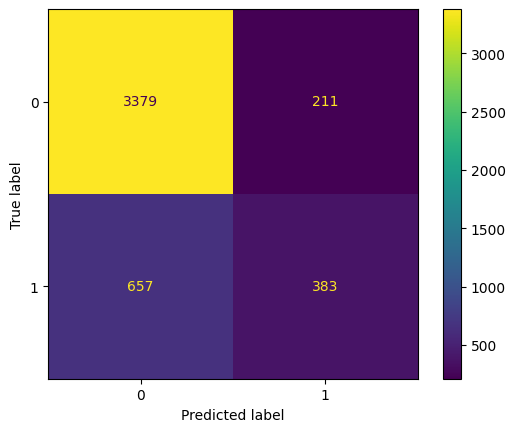

In [247]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test_transformed))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knn.predict(X_test_transformed))

-  True Negatives (3379): Correctly predicted non-defaulters.
-  False Positives (211): Non-defaulters incorrectly flagged as defaulters.
-  False Negatives (657): Defaulters missed by the model.
-  True Positives (383): Correctly identified defaulters


In [248]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=knn.predict(X_test_transformed)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3590
           1       0.64      0.37      0.47      1040

    accuracy                           0.81      4630
   macro avg       0.74      0.65      0.68      4630
weighted avg       0.79      0.81      0.79      4630



-  Class 0 remains strong: High precision and recall confirm reliable identification of non-defaulters.
-  Class 1 shows significant improvement:
- Precision increased from 0.43 → 0.64
- Recall increased from 0.11 → 0.37
- F1-score increased from 0.17 → 0.47
This means the model is now better at identifying actual defaulters, with fewer false negatives.


## <a id='toc1_3_'></a>[Feature Selection](#toc0_)

In [249]:
df_taiwan_FE.corr()

,Amount_of_Credit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep_2005,Repayment_Status_Aug_2005,Repayment_Status_Jul_2005,Repayment_Status_Jun_2005,Repayment_Status_May_2005,...,Bill_Statement_Jun_2005,Bill_Statement_May_2005,Bill_Statement_Apr_2005,Previous_Payment_Sep_2005,Previous_Payment_Aug_2005,Previous_Payment_Jul_2005,Previous_Payment_Jun_2005,Previous_Payment_May_2005,Previous_Payment_Apr_2005,Default_Payment_Next_Month
Amount_of_Credit,1.000000,-0.019349,0.240076,0.098033,0.123500,-0.124342,-0.130240,-0.123346,-0.118709,-0.110173,...,0.406947,0.405660,0.395285,0.223196,0.223476,0.237088,0.226402,0.246167,0.240682,-0.173595
Gender,-0.019349,1.000000,0.015067,-0.033269,0.104694,0.023822,0.026835,0.026339,0.025337,0.026573,...,0.008951,0.006127,0.007041,0.001638,0.000939,0.007381,0.002598,0.006190,-0.000708,0.039121
Education_Level,0.240076,0.015067,1.000000,-0.159196,-0.206049,-0.030968,-0.025562,-0.014873,-0.014784,-0.004436,...,0.054036,0.058170,0.054537,0.058814,0.059155,0.065303,0.056125,0.062032,0.063823,-0.051687
Marital_Status,0.098033,-0.033269,-0.159196,1.000000,0.408558,0.034384,0.037269,0.022980,0.027410,0.024929,...,0.040685,0.041762,0.038452,0.006462,0.004605,0.003336,0.010558,0.004278,0.007002,0.030420
Age,0.123500,0.104694,-0.206049,0.408558,1.000000,0.016149,0.018093,0.010800,0.017652,0.009013,...,0.075462,0.072856,0.071029,0.026646,0.028978,0.032660,0.022073,0.023581,0.019536,0.010668
Repayment_Status_Sep_2005,-0.124342,0.023822,-0.030968,0.034384,0.016149,1.000000,0.787847,0.558722,0.475405,0.431499,...,-0.089393,-0.078686,-0.076625,-0.061430,-0.041624,-0.040886,-0.055316,-0.047148,-0.033062,0.424552
Repayment_Status_Aug_2005,-0.130240,0.026835,-0.025562,0.037269,0.018093,0.787847,1.000000,0.670410,0.511972,0.451361,...,-0.109086,-0.098075,-0.094617,-0.076723,-0.042225,-0.044114,-0.052602,-0.051175,-0.033856,0.341367
Repayment_Status_Jul_2005,-0.123346,0.026339,-0.014873,0.022980,0.010800,0.558722,0.670410,1.000000,0.673880,0.529081,...,-0.128220,-0.113412,-0.107900,-0.047394,-0.055200,-0.038573,-0.046792,-0.050208,-0.041493,0.295248
Repayment_Status_Jun_2005,-0.118709,0.025337,-0.014784,0.027410,0.017652,0.475405,0.511972,0.673880,1.000000,0.711313,...,-0.130185,-0.110189,-0.099354,-0.063114,-0.046081,-0.034380,-0.044736,-0.051792,-0.048679,0.277025
Repayment_Status_May_2005,-0.110173,0.026573,-0.004436,0.024929,0.009013,0.431499,0.451361,0.529081,0.711313,1.000000,...,-0.125991,-0.105287,-0.091403,-0.063952,-0.052468,-0.042818,-0.025331,-0.044519,-0.044461,0.266401


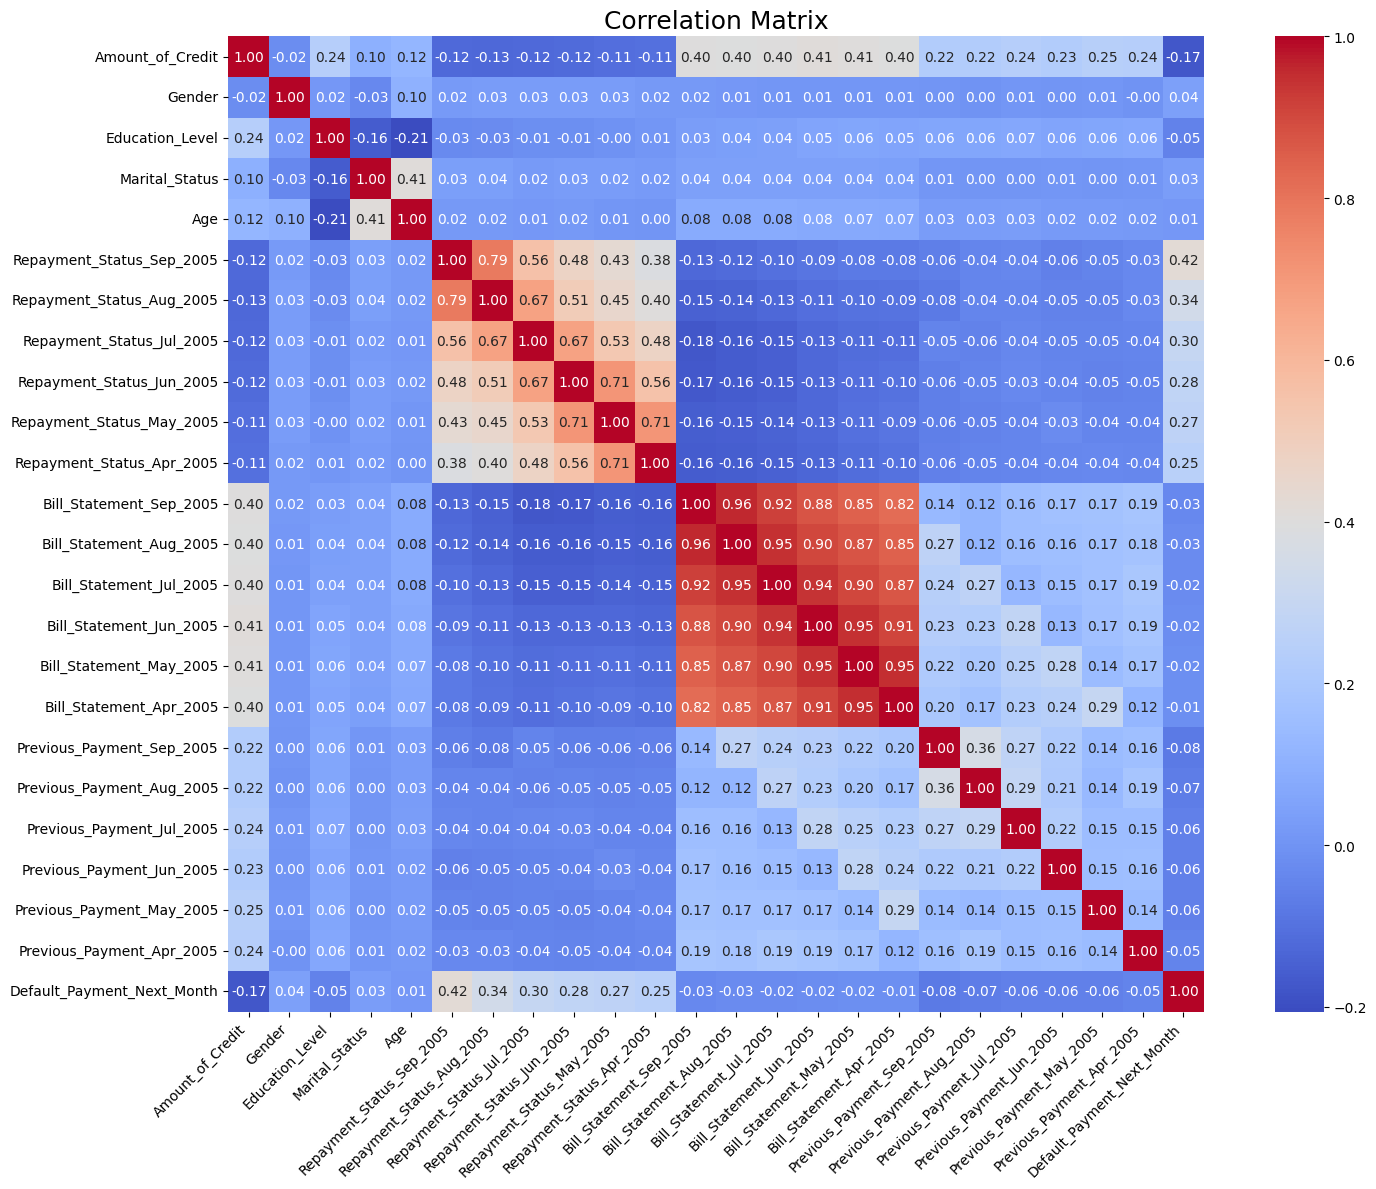

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))  
sns.heatmap(df_taiwan_FE.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Logistic regression

In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_transformed, y_train)

# Predict
y_pred = logreg.predict(X_test_transformed)

# Evaluate
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3590
           1       0.66      0.39      0.49      1040

    accuracy                           0.82      4630
   macro avg       0.75      0.66      0.69      4630
weighted avg       0.80      0.82      0.80      4630

[[3382  208]
 [ 638  402]]
